### One-Way ANOVA

The model is defined as:

$$ y_{ij} = \mu + \tau_i + \epsilon_{ij} $$

#### Notation

- $ y_{ij} $: Response for $j$-th observation of $i$-th treatment.
- $ \mu $: Overall mean.
- $ \tau_i $: Effect of $i$-th treatment; $ \sum_{i=1}^t \tau_i = 0 $.
- $ \epsilon_{ij} \sim N(0, \sigma^2) $: Random error.

#### Assumptions

1. Independence: Errors $ \epsilon_{ij} $ are independent.
2. Normality: $ \epsilon_{ij} \sim N(0, \sigma^2) $.
3. Homogeneity: Variance $ \sigma^2 $ is constant across groups.

#### Inference

- $ H_0: \tau_1 = \tau_2 = \ldots = \tau_t = 0 $.
- $ H_a $: At least one $ \tau_i \neq 0 $.

#### Between-Group Variance
$$ SS_B = \sum_{i=1}^t n_i (\bar{y}_i - \bar{y})^2, \quad MS_B = \frac{SS_B}{t-1} $$

#### Within-Group Variance
$$ SS_W = \sum_{i=1}^t \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_i)^2, \quad MS_W = \frac{SS_W}{N-t} $$

#### F-Statistic
$$ F = \frac{MS_B}{MS_W} \sim F(t-1,N-t)$$

#### Tukey's HSD

- Pairwise test for significant differences $H_0: r_i = r_j$.
- Test Statistic:
  $$ q = \frac{\bar{y}_i - \bar{y}_j}{SE}, \quad SE = \sqrt{\frac{MS_W}{n}} $$
- Confidence Interval:
  $$ CI = (\text{mean difference} \pm q_{\alpha, df, k} \cdot SE) $$


Descriptive Statistics:
Exposed: Mean=13.82, Variance=5.96, n=40
Sheltered: Mean=23.36, Variance=5.86, n=40


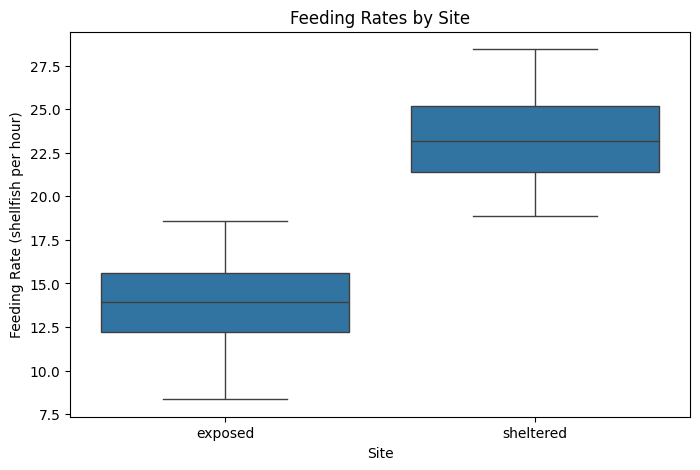


Normality Test (Shapiro-Wilk):
Exposed: W=0.99, p-value=0.9530
Sheltered: W=0.98, p-value=0.5136
Data Normality: Yes

Bartlett's Test for Equality of Variances:
Statistic=0.00, p-value=0.9549
Equal Variances: Yes

One-Way ANOVA Results (Low-Level Calculation):
SS_Between=1817.41, DF_Between=1, MS_Between=1817.41
SS_Within=460.93, DF_Within=78, MS_Within=5.91
F-Statistic=307.55, p-value=0.0000
Significant Difference: Yes

Tukey's HSD Test (Low-Level Calculation):
Mean Difference=9.53, SE=0.54, q-Statistic=17.54
95% CI: (8.45, 10.61)
Significant Difference: Yes


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f, t, shapiro, bartlett

# Load the data
df = pd.read_csv("data/CS2-oystercatcher-feeding.csv")

# Filter data for "exposed" and "sheltered" treatment groups
group_exposed = df[df['site'] == 'exposed']['feeding'].values
group_sheltered = df[df['site'] == 'sheltered']['feeding'].values

# Descriptive Statistics
mean_exposed = np.mean(group_exposed)
mean_sheltered = np.mean(group_sheltered)
var_exposed = np.var(group_exposed, ddof=1)
var_sheltered = np.var(group_sheltered, ddof=1)
n_exposed = len(group_exposed)
n_sheltered = len(group_sheltered)
grand_mean = np.mean(np.concatenate([group_exposed, group_sheltered]))

print("\nDescriptive Statistics:")
print(f"Exposed: Mean={mean_exposed:.2f}, Variance={var_exposed:.2f}, n={n_exposed}")
print(f"Sheltered: Mean={mean_sheltered:.2f}, Variance={var_sheltered:.2f}, n={n_sheltered}")

# Plot the data
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['site'].isin(['exposed', 'sheltered'])], x='site', y='feeding')
plt.title("Feeding Rates by Site")
plt.xlabel("Site")
plt.ylabel("Feeding Rate (shellfish per hour)")
plt.show()

# Check Assumptions: Normality
w_exposed, p_exposed = shapiro(group_exposed)
w_sheltered, p_sheltered = shapiro(group_sheltered)
print("\nNormality Test (Shapiro-Wilk):")
print(f"Exposed: W={w_exposed:.2f}, p-value={p_exposed:.4f}")
print(f"Sheltered: W={w_sheltered:.2f}, p-value={p_sheltered:.4f}")
print("Data Normality: Yes" if p_exposed > 0.05 and p_sheltered > 0.05 else "Data Normality: No")

# Check Assumptions: Equality of Variances
bartlett_stat, bartlett_p = bartlett(group_exposed, group_sheltered)
print("\nBartlett's Test for Equality of Variances:")
print(f"Statistic={bartlett_stat:.2f}, p-value={bartlett_p:.4f}")
print("Equal Variances: Yes" if bartlett_p > 0.05 else "Equal Variances: No")

# Low-Level One-Way ANOVA Calculation
# Between-group variance
ss_between = n_exposed * (mean_exposed - grand_mean) ** 2 + n_sheltered * (mean_sheltered - grand_mean) ** 2
df_between = 2 - 1
ms_between = ss_between / df_between

# Within-group variance
ss_within = ((n_exposed - 1) * var_exposed) + ((n_sheltered - 1) * var_sheltered)
df_within = (n_exposed - 1) + (n_sheltered - 1)
ms_within = ss_within / df_within

# F-statistic
f_stat = ms_between / ms_within
p_value_anova = 1 - f.cdf(f_stat, df_between, df_within)

print("\nOne-Way ANOVA Results (Low-Level Calculation):")
print(f"SS_Between={ss_between:.2f}, DF_Between={df_between}, MS_Between={ms_between:.2f}")
print(f"SS_Within={ss_within:.2f}, DF_Within={df_within}, MS_Within={ms_within:.2f}")
print(f"F-Statistic={f_stat:.2f}, p-value={p_value_anova:.4f}")
print("Significant Difference: Yes" if p_value_anova < 0.05 else "Significant Difference: No")

# Low-Level Tukey's HSD
mean_diff = abs(mean_exposed - mean_sheltered)
pooled_variance = ms_within
se = np.sqrt(pooled_variance * (1 / n_exposed + 1 / n_sheltered))
q_stat = mean_diff / se

# Degrees of freedom for Tukey's HSD (same as within-group ANOVA)
critical_tukey = t.ppf(1 - 0.05 / 2, df_within)
lower_ci = mean_diff - critical_tukey * se
upper_ci = mean_diff + critical_tukey * se
significant_tukey = "Yes" if lower_ci > 0 or upper_ci < 0 else "No"

print("\nTukey's HSD Test (Low-Level Calculation):")
print(f"Mean Difference={mean_diff:.2f}, SE={se:.2f}, q-Statistic={q_stat:.2f}")
print(f"95% CI: ({lower_ci:.2f}, {upper_ci:.2f})")
print(f"Significant Difference: {significant_tukey}")


Filtered Data Overview:
      site    feeding
0  exposed  12.175506
1  exposed  13.073917
2  exposed  17.939687
3  exposed  13.891783
4  exposed  14.051663

Summary Statistics by Group:
           count   mean   std    min    25%    50%    75%    max
site                                                            
exposed     40.0  13.82  2.44   8.35  12.18  13.95  15.58  18.56
sheltered   40.0  23.36  2.42  18.86  21.40  23.17  25.20  28.45


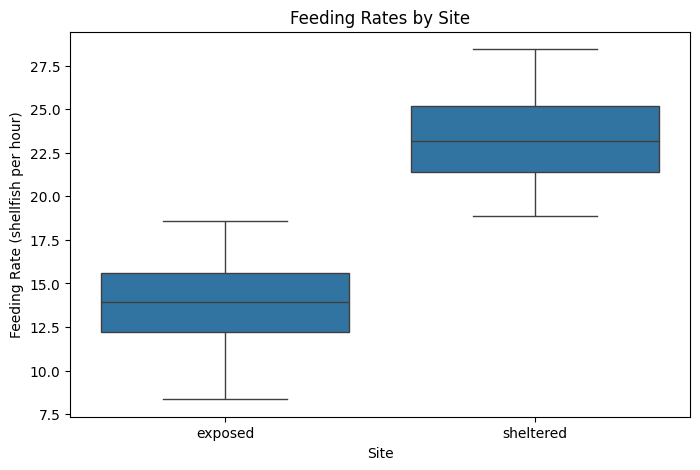


Checking Assumptions:
exposed: W=0.99, p-value=0.9530 (Normal)
sheltered: W=0.98, p-value=0.5136 (Normal)

Bartlett's Test: Statistic=0.00, p-value=0.9549 (Equal Variances)

ANOVA Results:
               sum_sq    df           F        PR(>F)
C(site)   1817.411024   1.0  307.545969  8.648415e-29
Residual   460.932915  78.0         NaN           NaN

Tukey's HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj lower   upper  reject
------------------------------------------------------
exposed sheltered   9.5326   0.0 8.4504 10.6148   True
------------------------------------------------------


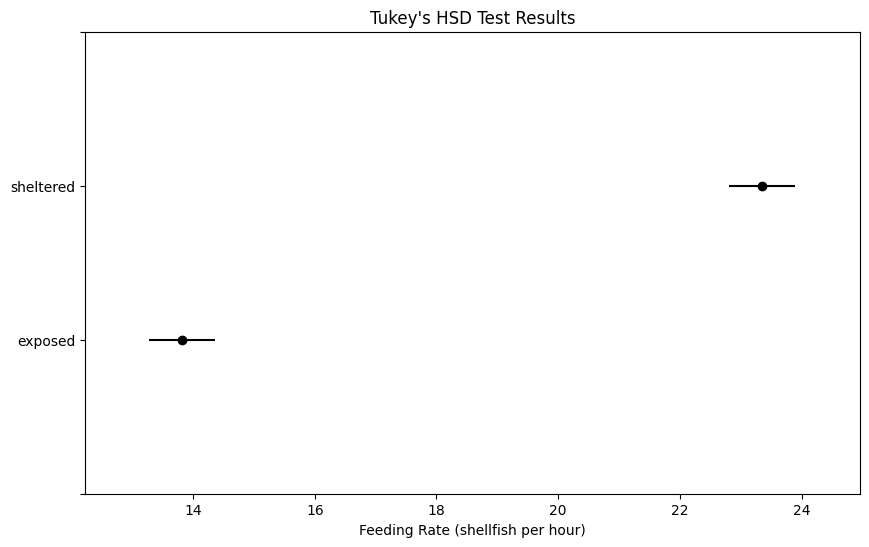

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, bartlett
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
df = pd.read_csv("data/CS2-oystercatcher-feeding.csv")

# Filter data for "exposed" and "sheltered" treatment groups
df_filtered = df[df['site'].isin(['exposed', 'sheltered'])]

# Display the first few rows
print("Filtered Data Overview:")
print(df_filtered.head())

# Descriptive Statistics
summary_stats = df_filtered.groupby("site")["feeding"].describe().round(2)
print("\nSummary Statistics by Group:")
print(summary_stats)

# Boxplot of Feeding Rates by Site
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x="site", y="feeding")
plt.title("Feeding Rates by Site")
plt.xlabel("Site")
plt.ylabel("Feeding Rate (shellfish per hour)")
plt.show()

# Check Assumptions: Normality
print("\nChecking Assumptions:")
for site, group in df_filtered.groupby("site"):
    w, p = shapiro(group["feeding"])
    print(f"{site}: W={w:.2f}, p-value={p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

# Check Assumptions: Equal Variances (Bartlett's Test)
bartlett_stat, bartlett_p = bartlett(
    df_filtered[df_filtered['site'] == 'exposed']['feeding'],
    df_filtered[df_filtered['site'] == 'sheltered']['feeding']
)
print(f"\nBartlett's Test: Statistic={bartlett_stat:.2f}, p-value={bartlett_p:.4f} "
      f"{'(Equal Variances)' if bartlett_p > 0.05 else '(Unequal Variances)'}")

# Perform One-Way ANOVA using Statsmodels
model = sm.OLS.from_formula("feeding ~ C(site)", data=df_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA table
print("\nANOVA Results:")
print(anova_table)

# Post-hoc Testing (Tukey's HSD)
tukey = pairwise_tukeyhsd(
    endog=df_filtered["feeding"],  # Dependent variable
    groups=df_filtered["site"],   # Grouping variable
    alpha=0.05                    # Significance level
)
print("\nTukey's HSD Test Results:")
print(tukey)

# Plot Tukey's HSD Results
tukey.plot_simultaneous()
plt.title("Tukey's HSD Test Results")
plt.xlabel("Feeding Rate (shellfish per hour)")
plt.show()


### Three Level ANOVA

Data Overview:
      site    feeding
0  exposed  12.175506
1  exposed  13.073917
2  exposed  17.939687
3  exposed  13.891783
4  exposed  14.051663

Summary Statistics by Group:
           count   mean   std    min    25%    50%    75%    max
site                                                            
exposed     40.0  13.82  2.44   8.35  12.18  13.95  15.58  18.56
partial     40.0  17.08  2.62  10.80  15.60  16.93  18.42  23.02
sheltered   40.0  23.36  2.42  18.86  21.40  23.17  25.20  28.45


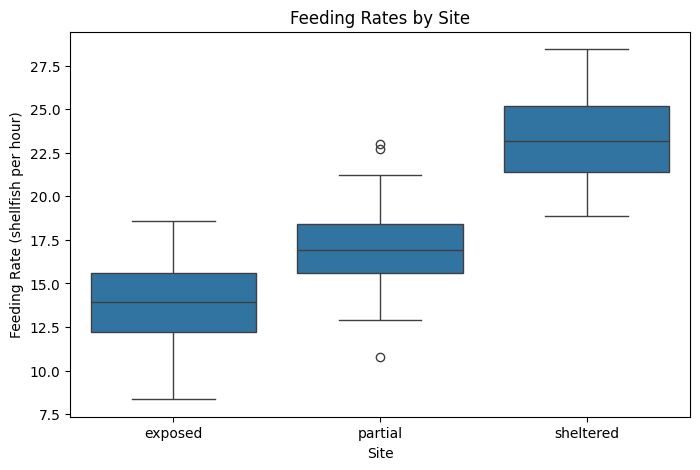


Checking Assumptions: Normality
exposed: W=0.99, p-value=0.9530 (Normal)
partial: W=0.99, p-value=0.9398 (Normal)
sheltered: W=0.98, p-value=0.5136 (Normal)

Bartlett's Test: Statistic=0.30, p-value=0.8624 (Equal Variances)

ANOVA Results:
               sum_sq     df           F        PR(>F)
C(site)   1878.015371    2.0  150.782449  4.128088e-33
Residual   728.625249  117.0         NaN           NaN

Tukey's HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj lower   upper  reject
------------------------------------------------------
exposed   partial   3.2588   0.0 1.9341  4.5834   True
exposed sheltered   9.5326   0.0 8.2079 10.8573   True
partial sheltered   6.2738   0.0 4.9492  7.5985   True
------------------------------------------------------


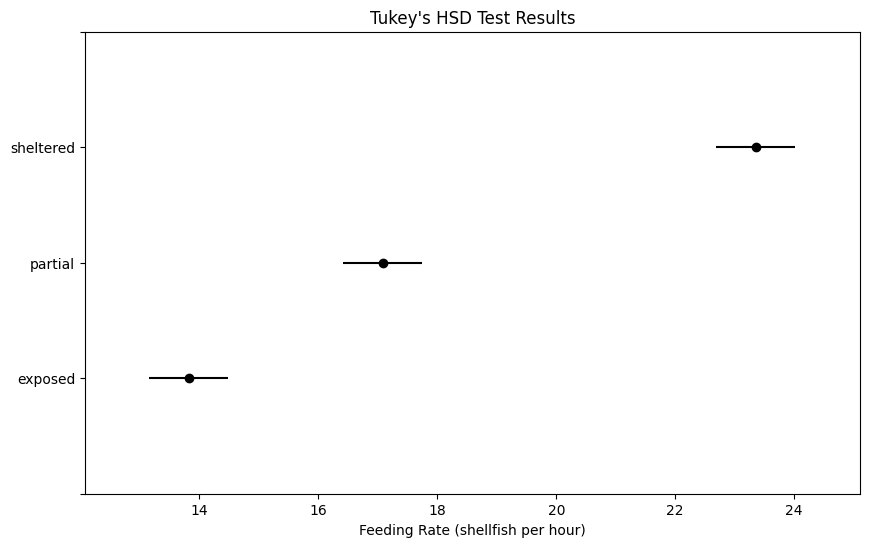

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, bartlett
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
df = pd.read_csv("data/CS2-oystercatcher-feeding.csv")

# Display the first few rows
print("Data Overview:")
print(df.head())

# Descriptive Statistics
summary_stats = df.groupby("site")["feeding"].describe().round(2)
print("\nSummary Statistics by Group:")
print(summary_stats)

# Boxplot of Feeding Rates by Site
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="site", y="feeding")
plt.title("Feeding Rates by Site")
plt.xlabel("Site")
plt.ylabel("Feeding Rate (shellfish per hour)")
plt.show()

# Check Assumptions: Normality (Shapiro-Wilk Test)
print("\nChecking Assumptions: Normality")
for site, group in df.groupby("site"):
    w, p = shapiro(group["feeding"])
    print(f"{site}: W={w:.2f}, p-value={p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

# Check Assumptions: Equal Variances (Bartlett's Test)
bartlett_stat, bartlett_p = bartlett(
    df[df['site'] == 'exposed']['feeding'],
    df[df['site'] == 'sheltered']['feeding'],
    df[df['site'] == 'partial']['feeding']
)
print(f"\nBartlett's Test: Statistic={bartlett_stat:.2f}, p-value={bartlett_p:.4f} "
      f"{'(Equal Variances)' if bartlett_p > 0.05 else '(Unequal Variances)'}")

# Perform One-Way ANOVA using Statsmodels
model = sm.OLS.from_formula("feeding ~ C(site)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA table
print("\nANOVA Results:")
print(anova_table)

# Post-hoc Testing (Tukey's HSD)
tukey = pairwise_tukeyhsd(
    endog=df["feeding"],  # Dependent variable
    groups=df["site"],    # Grouping variable
    alpha=0.05            # Significance level
)
print("\nTukey's HSD Test Results:")
print(tukey)

# Plot Tukey's HSD Results
tukey.plot_simultaneous()
plt.title("Tukey's HSD Test Results")
plt.xlabel("Feeding Rate (shellfish per hour)")
plt.show()


### Two-Way ANOVA

Evaluates the effects of two factors and their interaction on a response variable.

#### Model

$y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk}$

#### Notation

- $y_{ijk}$: Response for the $k$-th observation under $i$-th level of Factor A and $j$-th level of Factor B.  
- $\mu$: Overall mean.  
- $\alpha_i$: Effect of $i$-th level of Factor A.  
- $\beta_j$: Effect of $j$-th level of Factor B.  
- $(\alpha\beta)_{ij}$: Interaction effect of Factor A and Factor B.  
- $\epsilon_{ijk} \sim N(0, \sigma^2)$: Random error term.  

#### Assumptions

1. Observations are independent.  
2. $\epsilon_{ijk} \sim N(0, \sigma^2)$ (errors are normally distributed).  
3. Variance is constant across groups.  

#### Hypotheses

- Interaction Effect:  
  $H_0: (\alpha\beta)_{ij} = 0$, $H_a: (\alpha\beta)_{ij} \neq 0$.  
- Factor A Main Effect:  
  $H_0: \alpha_1 = \alpha_2 = \ldots = \alpha_I = 0$, $H_a$: At least one $\alpha_i \neq 0$.  
- Factor B Main Effect:  
  $H_0: \beta_1 = \beta_2 = \ldots = \beta_J = 0$, $H_a$: At least one $\beta_j \neq 0$.  

#### Test Statistics

- $F$-statistic for $(\alpha\beta)_{ij}$ (interaction effect).  
- Separate $F$-statistics for $\alpha_i$ and $\beta_j$ (main effects).  

#### Interpretation

1. Significant Interaction: Factors influence the response jointly; interpret main effects cautiously.  
2. Non-Significant Interaction: Main effects can be interpreted independently.  

Data Overview:
      sex exercise     weight
0  female  control  76.479123
1  female  control  70.300685
2  female  control  75.396262
3  female  control  77.510382
4  female  control  75.959855

Summary Statistics by Group:
                 count   mean   std    min    25%    50%    75%    max
sex    exercise                                                       
female control    41.0  74.35  4.23  66.24  70.97  73.65  77.51  83.52
       runner     36.0  65.31  3.26  59.16  62.42  65.66  67.55  72.19
male   control    42.0  82.07  3.33  75.85  79.60  82.53  84.90  88.86
       runner     41.0  79.39  3.07  72.42  76.88  78.96  81.75  86.14


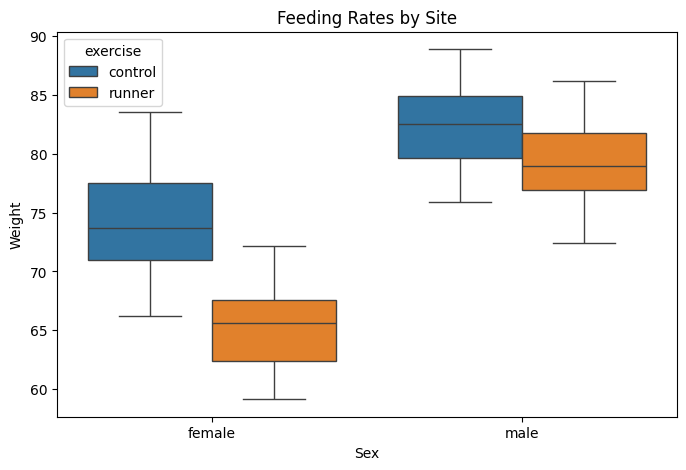


Normality Test:
female: W=0.97, p-value=0.1270 (Normal)
male: W=0.99, p-value=0.7273 (Normal)

Two-Way ANOVA Results:
                   sum_sq     df           F        PR(>F)
exercise      1311.970522    1.0  106.733448  2.177106e-19
sex           4636.450232    1.0  377.191645  1.760076e-43
exercise:sex   404.434414    1.0   32.902172  4.889216e-08
Residual      1917.556353  156.0         NaN           NaN

Tukey's HSD Test Results:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1       group2    meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------
controlfemale  controlmale   7.7179    0.0    5.719   9.7168   True
controlfemale runnerfemale  -9.0446    0.0 -11.1242  -6.9651   True
controlfemale   runnermale   5.0445    0.0   3.0335   7.0554   True
  controlmale runnerfemale -16.7626    0.0 -18.8305 -14.6946   True
  controlmale   runnermale  -2.6734 0.0037  -4.6724  -0.6745   True
 runnerfemale  

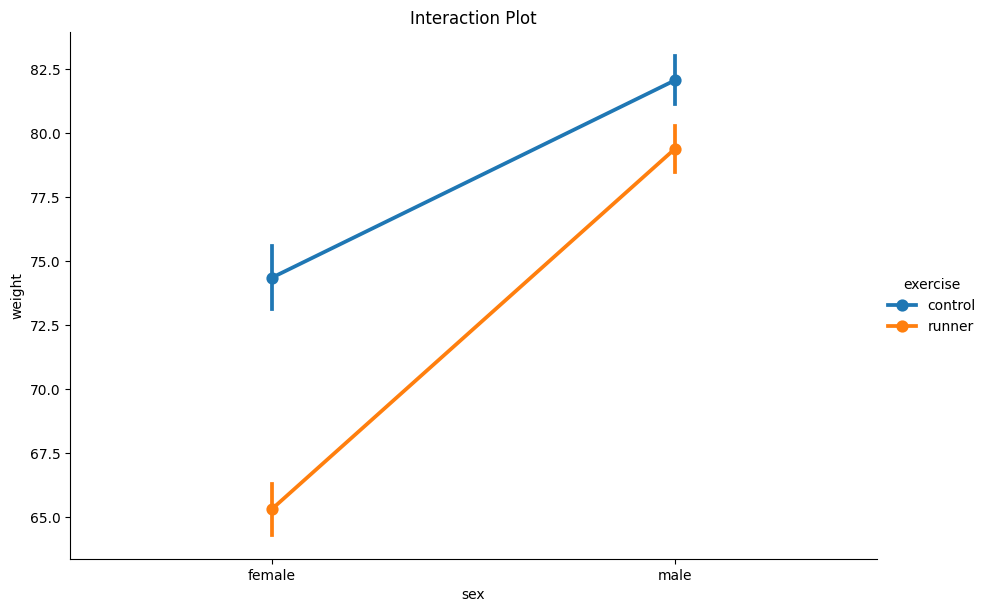

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
df = pd.read_csv("data/CS4-exercise.csv")

# Display first few rows
print("Data Overview:")
print(df.head())

# Descriptive statistics by group
summary_stats = df.groupby(['sex', 'exercise'])['weight'].describe().round(2)
print("\nSummary Statistics by Group:")
print(summary_stats)

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="sex", y="weight", hue="exercise")
plt.title("Feeding Rates by Site")
plt.xlabel("Sex")
plt.ylabel("Weight")
plt.show()

# Check assumptions for normality (Shapiro-Wilk Test)
print("\nNormality Test:")
for site, group in df.groupby("sex"):
    w, p = shapiro(group["weight"])
    print(f"{site}: W={w:.2f}, p-value={p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

# Create a linear model with interaction between sex and exercise
model = ols("weight ~ exercise * sex", data=df).fit()

# Perform two-way ANOVA
anova_results = anova_lm(model, typ=2)  # Type 2 ANOVA table
print("\nTwo-Way ANOVA Results:")
print(anova_results)

# Post-hoc testing using Tukey's HSD
tukey = pairwise_tukeyhsd(df["weight"], df["exercise"] + df["sex"], alpha=0.05)
print("\nTukey's HSD Test Results:")
print(tukey)

# Interaction plot to visualize the relationship between predictors
sns.catplot(x="sex", y="weight", hue="exercise", kind="point", data=df, height=6, aspect=1.5)
plt.title("Interaction Plot")
plt.show()